In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json
import time
from pandas.io.json import json_normalize

In [54]:
#Get data from Alpha Vantage using API request

url = "https://www.alphavantage.co/query"
params = {
        "function": "TIME_SERIES_DAILY_ADJUSTED",
        "symbol": "CL",
        "outputsize": "full",
        "apikey": "ac9ba10aa04a7d"}



response = requests.get(url, params=params)
data = response.json()

def df_from_response(data,
         columns=['Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume']):

    def convert_response(d):
        # convert the response into datetimerecords that can be
        # parsed by Pandas
        for dt, prec in d['Time Series (Daily)'].items():
            r = { 'date': dt}
            r.update(prec)
            yield r
               
    # pass your response 'page'
    df = pd.DataFrame(convert_response(data))
    # rename the columns    
    df = df.rename(columns={'1. open': 'Open',
                            '2. high': 'High',
                            '3. low': 'Low',
                            '4. close': 'Close',
                            '5. adjusted close': 'AdjClose',
                            '6. volume': 'Volume'})
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df.sort_index(inplace=True)
    # extract the default columns
    df = df[columns]
    return df

df = df_from_response(data)
df.reset_index(level=0, inplace=True)
df.head()
# df = pd.DataFrame({'dates':pd.date_range('2018-01-01','2019-01-01')})
# newfd = df.columns = ['date' if x=='datetime' else x for x in df.columns]
# nf_h = pd.DataFrame(newfd)
# print('Data Frame:', nf_h)

,date,Open,High,Low,Close,AdjClose,Volume
0,1998-01-02,74.5000,74.5000,72.6900,73.2500,11.9706,451500
1,1998-01-05,74.0000,74.8800,73.2500,74.8800,12.2369,770000
2,1998-01-06,74.9400,74.9400,71.7500,71.9400,11.7565,861600
3,1998-01-07,70.2500,71.6300,69.8800,71.6300,11.7058,1125100
4,1998-01-08,71.6300,71.7500,69.3800,69.7500,11.3986,949700


In [55]:
#Convert results into a dataframe and assign an index
df1 = pd.DataFrame(df)
df1.reset_index(level=0, inplace=True)
df1.head()

,index,date,Open,High,Low,Close,AdjClose,Volume
0,0,1998-01-02,74.5000,74.5000,72.6900,73.2500,11.9706,451500
1,1,1998-01-05,74.0000,74.8800,73.2500,74.8800,12.2369,770000
2,2,1998-01-06,74.9400,74.9400,71.7500,71.9400,11.7565,861600
3,3,1998-01-07,70.2500,71.6300,69.8800,71.6300,11.7058,1125100
4,4,1998-01-08,71.6300,71.7500,69.3800,69.7500,11.3986,949700


In [92]:
# Select the date range we want to plot (this one will be for the year 2000)
df2 = df1[(df1['date'] > '2000-07-01') & (df1['date'] < '2000-09-30')]
df2.head()

,index,date,Open,High,Low,Close,AdjClose,Volume
630,630,2000-07-03,59.6300,60.0000,58.6300,59.8800,20.1801,864500
631,631,2000-07-05,59.0000,59.8100,58.8800,59.3100,19.9880,1610600
632,632,2000-07-06,59.8800,60.2500,58.7500,58.8100,19.8195,1355900
633,633,2000-07-07,57.5000,57.9400,56.8800,57.1900,19.2735,2124900
634,634,2000-07-10,57.2500,57.8800,55.5000,55.6900,18.7680,1475400


In [99]:
df2['date'] = pd.to_datetime(df2['date'])
df2values = pd.DataFrame(df2.Close, df2.Volume)

df2values.set_index('date')
df2values.head()

C:\Users\kantaranas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


KeyError: 'date'

C:\Users\kantaranas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\kantaranas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """


TypeError: Empty 'DataFrame': no numeric data to plot

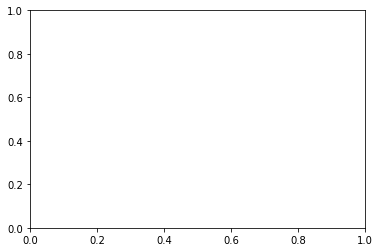

In [84]:
df2['date'] = pd.to_datetime(df['date'])
fig, ax = plt.subplots()

for name, group in df2.set_index('date').groupby(['Close', 'AdjClose']):
    group['Volume'].resample('M', 'sum').plot(ax=ax, label=name)


# df2 = df.set_index('date').groupby(['Close', 'date']).resample('M', 'sum')
# df2['Volume'].unstack([0,1]).plot()

In [57]:
# Select the column of data needed for plotting
df2close = pd.DataFrame(df2[['date','Close']])
df2close.Close.dtype
df2close.Close = df2close.Close.astype(float)
df2close.head()

,date,Close
630,2000-07-03,59.88
631,2000-07-05,59.31
632,2000-07-06,58.81
633,2000-07-07,57.19
634,2000-07-10,55.69


In [58]:
# Select the date range we want to plot (this one will be for the year 2000)
df3 = df1[(df1['date'] > '2001-07-01') & (df1['date'] < '2001-09-30')]
df3.head()

,index,date,Open,High,Low,Close,AdjClose,Volume
881,881,2001-07-02,58.9900,60.2200,58.9900,59.9800,20.4474,2085500
882,882,2001-07-03,60.0000,60.4500,59.3800,60.2500,20.5394,707500
883,883,2001-07-05,60.1000,60.1000,59.0500,59.6300,20.3280,1155600
884,884,2001-07-06,59.6300,59.7000,58.8000,59.0400,20.1269,1003100
885,885,2001-07-09,59.0400,59.0700,58.0000,58.4300,19.9190,1981300


In [59]:
# Select the column of data needed for plotting
df32001 = pd.DataFrame(df3[['date','Close']])
df32001.Close.dtype
df32001.Close = df3.Close.astype(float)
df32001.head()

,date,Close
881,2001-07-02,59.98
882,2001-07-03,60.25
883,2001-07-05,59.63
884,2001-07-06,59.04
885,2001-07-09,58.43


In [60]:
print(df2close.info(), df32001.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 630 to 692
Data columns (total 2 columns):
date     63 non-null datetime64[ns]
Close    63 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 881 to 939
Data columns (total 2 columns):
date     59 non-null datetime64[ns]
Close    59 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB
None None


In [61]:
df2close['pct_change df2'] = df2close.Close.pct_change()
df2close.head()

,date,Close,pct_change df2
630,2000-07-03,59.88,NaN
631,2000-07-05,59.31,-0.009519
632,2000-07-06,58.81,-0.008430
633,2000-07-07,57.19,-0.027546
634,2000-07-10,55.69,-0.026228


In [62]:
df32001['pct_changedf3'] = df32001.Close.pct_change()
df32001.head()

,date,Close,pct_changedf3
881,2001-07-02,59.98,NaN
882,2001-07-03,60.25,0.004502
883,2001-07-05,59.63,-0.010290
884,2001-07-06,59.04,-0.009894
885,2001-07-09,58.43,-0.010332


In [63]:
df2closeadd = df2close.loc[(df1['date'] > '2000-07-01') & (df1['date'] < '2000-09-30')]
df32001add = df32001.loc[(df1['date'] > '2001-07-01') & (df1['date'] < '2001-09-30')]

In [64]:
df32001add.append(df32001add).head()

,date,Close,pct_changedf3
881,2001-07-02,59.98,NaN
882,2001-07-03,60.25,0.004502
883,2001-07-05,59.63,-0.010290
884,2001-07-06,59.04,-0.009894
885,2001-07-09,58.43,-0.010332


In [65]:
close = pd.DataFrame({'2000':df2close.Close, '2001':df32001.Close})
close.dropna()

,2000,2001


C:\Users\kantaranas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


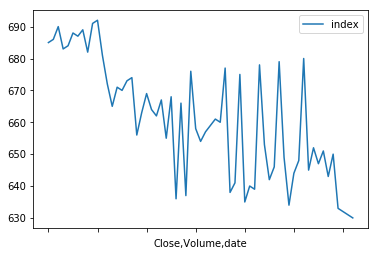

In [77]:
# df2['date'] = pd.to_datetime(df2['date'], errors='coerce')
# df2.set_index('date', inplace=True)
df2['date'] = pd.to_datetime(df['date'])
df2.set_index('date').groupby(['Close', 'Volume']).resample('M', 'sum').plot()

# df2['Volume'][[df2.date] >['2000-07-01']].resample('M').sum().plot()